## <b>Weather forecast project 

# <b>06 - NEURAL NETWORK MODEL

#### Sur ce NoteBook nous allons aborder 2 modeles complexes : Réseau de neurones (Deep Neural Network) / Ensemble Models : (XGBoost)

### Packages nécessaires au notebook :

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, classification_report, make_scorer, recall_score, f1_score

from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.callbacks import Callback

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.optimizers import Adam

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


# Modele complexe 1 : Deep Neural Network

#### Import des données

In [2]:
df = pd.read_csv('data_features.csv', sep=',', index_col=0) 
df.head()


,sunshine,windgustspeed,humidity3pm,pressure3pm,year,windspeed3pm,temp_amplitude,cloud3pm,rainfall,climat,...,cloud9am,winddir9am_sin,latitude,month,geography,raintoday,evaporation,windspeed9am,windgustdir_cos,raintomorrow
0,10.9,44.0,22.0,1007.1,2008,24.0,9.5,7.0,0.6,0,...,8.0,1.224647e-16,-36.065766,12,0,0,7.6,20.0,-1.000000,0
1,12.9,44.0,25.0,1007.8,2008,22.0,17.7,1.0,0.0,0,...,1.0,9.238795e-01,-36.065766,12,0,0,12.0,4.0,-0.923880,0
2,8.0,46.0,30.0,1008.7,2008,26.0,12.8,2.0,0.0,0,...,7.0,1.224647e-16,-36.065766,12,0,0,8.0,19.0,-0.923880,0
3,2.2,24.0,16.0,1012.8,2008,9.0,18.8,6.0,0.0,0,...,8.0,-7.071068e-01,-36.065766,12,0,0,10.0,11.0,0.707107,0
4,6.7,41.0,33.0,1006.0,2008,20.0,14.8,8.0,1.0,0,...,7.0,3.826834e-01,-36.065766,12,0,0,4.8,7.0,-1.000000,0


#### Séparation des données en variables explicatives et variable cible

In [3]:
X = df.drop(columns=["raintomorrow"])
y = df["raintomorrow"]

#### Diviser les données en ensembles d'entraînement, de validation et de test

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

#### Création du modèle de réseau de neurones / Compilation / Entrainement / Evaluation

In [5]:
model = Sequential()
model.add(Dense(256, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

"""
Cette partie crée un modèle de réseau de neurones à l'aide de Keras. 
Le modèle est de type séquentiel et contient plusieurs couches denses (Fully Connected) avec des fonctions d'activation ReLU 
et des couches Dropout pour la régularisation. La couche de sortie utilise une activation sigmoïde pour la classification binaire
Dense : une couche où chaque neurone est connecté à tous les neurones de la couche précédente et de la couche suivante.
Dropout : technique de régularisation utilisée pour éviter le surapprentissage (overfitting) dans les réseaux de neurones
ReLU Sigmoid sont deux fonctions d'activation couramment utilisées dans les réseaux de neurones. 
Relu : f(x) = max(0, x)
Sigmoid : f(x) = 1 / (1 + exp(-x))
"""

model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

"""
La compilation du modèle définit l'optimiseur, la fonction de perte et les métriques d'évaluation. 
L'optimiseur Adam est utilisé avec un taux d'apprentissage de 0.001. La fonction de perte est "binary_crossentropy", 
adaptée à la classification binaire, et la métrique d'évaluation est l'accuracy (précision).
Optimiseur Adam: algorithme d'optimisation basé sur la descente de gradient
binary_crossentropy  Cette fonction de perte mesure la différence entre les probabilités prédites les véritables étiquettes des données.
"""

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

"""
Le modèle est évalué sur l'ensemble de test pour mesurer sa performance en termes de perte (loss) et de précision (accuracy).
"""


Epoch 1/100
1364/1364 [==============================] - 15s 8ms/step - loss: 1.5075 - accuracy: 0.7971 - val_loss: 0.4470 - val_accuracy: 0.8409
Epoch 2/100
1364/1364 [==============================] - 10s 7ms/step - loss: 0.4579 - accuracy: 0.8375 - val_loss: 0.4382 - val_accuracy: 0.8409
Epoch 3/100
1364/1364 [==============================] - 10s 7ms/step - loss: 0.4465 - accuracy: 0.8386 - val_loss: 0.4370 - val_accuracy: 0.8409
Epoch 4/100
1364/1364 [==============================] - 9s 7ms/step - loss: 0.4372 - accuracy: 0.8389 - val_loss: 0.4123 - val_accuracy: 0.8409
Epoch 5/100
1364/1364 [==============================] - 10s 8ms/step - loss: 0.3998 - accuracy: 0.8409 - val_loss: 0.3481 - val_accuracy: 0.8409
Epoch 6/100
1364/1364 [==============================] - 11s 8ms/step - loss: 0.3667 - accuracy: 0.8504 - val_loss: 0.3415 - val_accuracy: 0.8627
Epoch 7/100
1364/1364 [==============================] - 10s 7ms/step - loss: 0.3563 - accuracy: 0.8550 - val_loss: 0.3248 - 

"\nLe modèle est évalué sur l'ensemble de test pour mesurer sa performance en termes de perte (loss) et de précision (accuracy).\n"

#### Figure avec deux subplots pour la précision et la perte

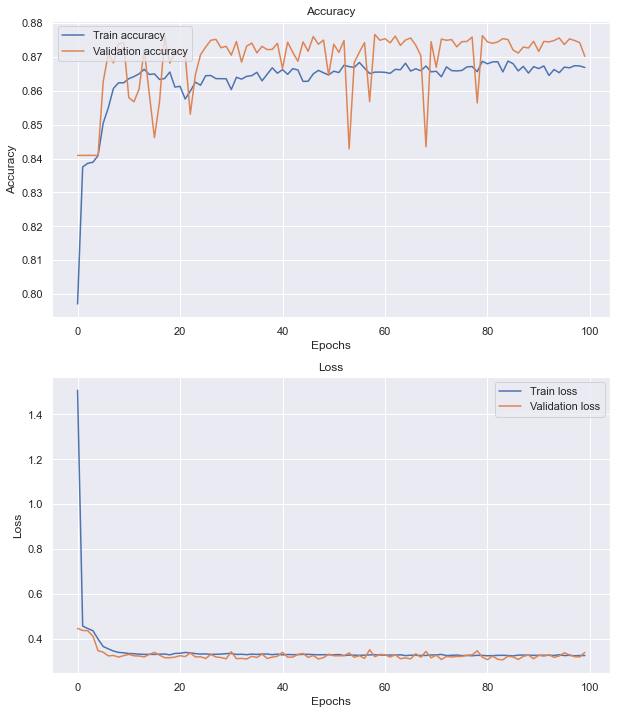

In [7]:
sns.set(style="darkgrid")
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Tracer la précision pour l'entraînement et la validation
ax1.plot(history.history['accuracy'], label='Train accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend(loc='upper left')
ax1.set_title('Accuracy')

# Tracer la perte pour l'entraînement et la validation
ax2.plot(history.history['loss'], label='Train loss')
ax2.plot(history.history['val_loss'], label='Validation loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend(loc='upper right')
ax2.set_title('Loss')

plt.show()

### Interprétation du resultat

##### Nous obtenons un score d'accuracy de 87% et un testloss de 0.33

##### Évaluation de la précision: Notre modele apprend correctement,la précision de validation suit une tendance similaire et ne diminue pas, le modèle n'est donc pas en train de surapprendre.

##### Évaluation de la perte: La perte d'entraînement diminue de manière stable. La perte de validation n'augmente pas alors que la perte d'entraînement continue de diminuer, donc pas de surapprentissage.

##### Une précision de 87% dans la prédiction météorologique est généralement considérée comme plutot bonne. La météorologie est un domaine complexe qui implique un grand nombre de variables et d'incertitudes

# Modele complexe 2 : XGBoost

##### XGBoost est particulièrement adapté aux problèmes de classification et offre de meilleures performances et une précision accrue par rapport aux autres algorithmes de Gradient Boosting.
##### XGBoost utilise une parallélisation pour entraîner les arbres, inclut des termes de régularisation dans sa fonction de coût pour éviter le surapprentissage (overfitting) et est capable de gérer des données manquantes en trouvant automatiquement la meilleure direction pour les observations manquantes 

#### Import des données

In [9]:
df = pd.read_csv('data_features.csv', sep=',', index_col=0) 

#### Séparation des données en variables explicatives et variable cible

In [10]:
X = df.drop(columns=["raintomorrow"])
y = df["raintomorrow"]

#### Diviser les données en ensembles d'entraînement et de validation 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Creation, Entrainement, Prediction et Calcul de Precision du modele

In [12]:
xgb_model = XGBClassifier(n_estimators=1000, max_depth=6, learning_rate=0.05, subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb_model.fit(X_train, y_train, early_stopping_rounds=50, eval_set=[(X_val, y_val)], verbose=False)

y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

C:\Users\alain\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Test accuracy: 0.8908678311098887


#### Parametre utilisé

###### n_estimators : Nombre d'arbres à construire pour le modèle. n_estimators=1000 signifie que le modèle construira 1000 arbres.
###### max_depth : Profondeur maximale de chaque arbre. max_depth=6 signifie que chaque arbre aura une profondeur maximale de 6 niveaux.
###### learning_rate : Taux d'apprentissage, qui contrôle la contribution de chaque arbre au modèle final. learning_rate=0.05 signifie que chaque arbre contribue avec un poids de 0.05 au modèle final.
###### subsample : Fraction des données d'entraînement à utiliser pour chaque arbre. subsample=0.8 signifie que 80% des données d'entraînement seront utilisées pour construire chaque arbre.
###### colsample_bytree : Fraction des caractéristiques (colonnes) à utiliser pour chaque arbre. colsample_bytree=0.8 signifie que 80% des caractéristiques seront utilisées pour construire chaque arbre.
###### random_state : Graine aléatoire pour reproduire les résultats. random_state=42 signifie que la graine aléatoire est fixée à 42.
###### early_stopping_rounds=50 signifie que si la métrique d'évaluation ne s'améliore pas pendant 50 tours consécutifs, l'entraînement s'arrête.
###### eval_set : Liste des ensembles de données de validation à utiliser pour évaluer la métrique d'évaluation à chaque tour.
###### verbose : Contrôle le niveau de détail de la sortie pendant l'entraînement. verbose=False signifie que la sortie sera silencieuse

#### Matrice de Confusion

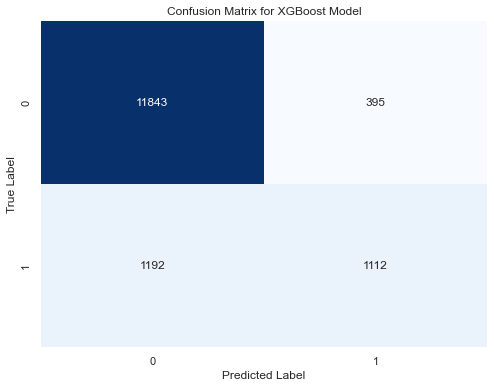

In [13]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion en tant que heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for XGBoost Model')
plt.show()

#### Features Importance

<Figure size 2160x1080 with 0 Axes>

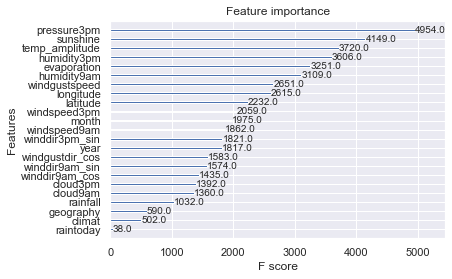

In [18]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plt.figure(figsize=(30, 15))
plt.rcParams['font.size'] = 10

plot_importance(xgb_model)

plt.show()


#### Courbe ROC

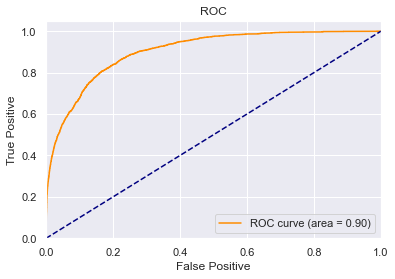

In [20]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = xgb_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()


### Interprétation du resultat

##### Nous obtenons un score d'accuracy de 89%

##### La courbe ROC montre la performance d'un modèle de classification, notre AUC est à 1 ce qui indique un classificateur parfait